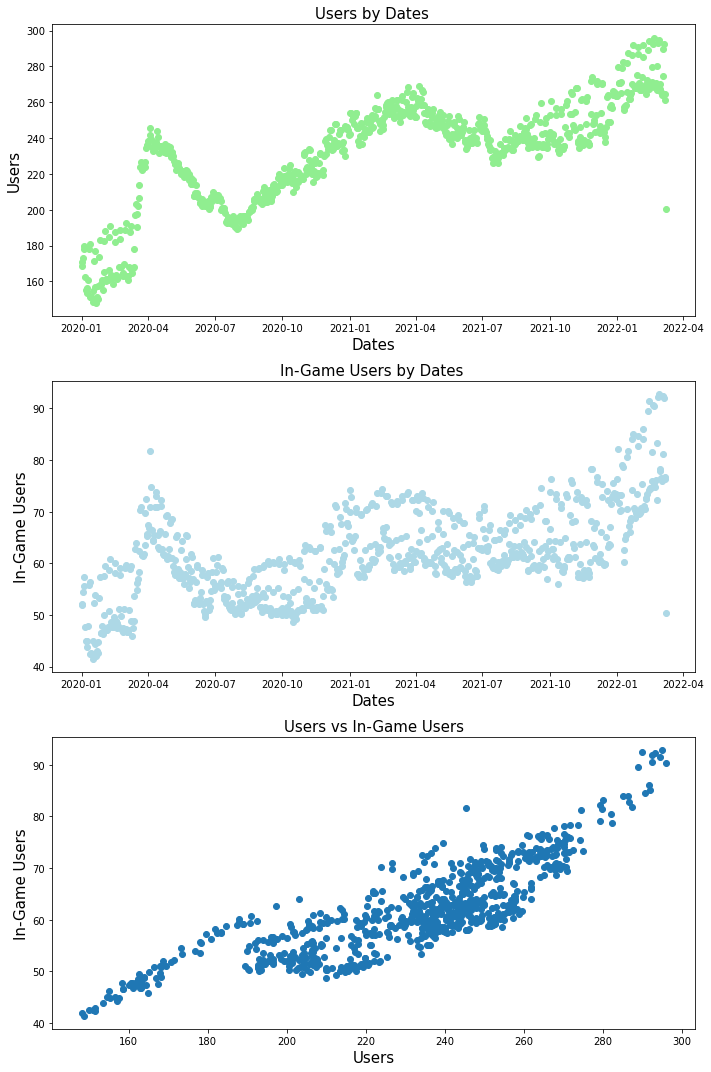

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
SteamRaw = pd.read_excel("Steam.xlsx")
SteamRaw['Dates'] = pd.to_datetime(SteamRaw['Date']).dt.date
SteamRefined = SteamRaw.drop(columns=['Date'])
SteamRefined = SteamRefined[['Dates', 'Users', 'In-Game']]
SteamRefined['Users'] = SteamRefined['Users'].div(100000).round(2)
SteamRefined['In-Game'] = SteamRefined['In-Game'].div(100000).round(2)
SteamRefined.to_csv('Steam.csv')

fig, axes = plt.subplots(3, figsize=(10,15))
axes[0].scatter(SteamRefined['Dates'],SteamRefined['Users'],color = 'lightgreen') # plot a scatter plot on axes[0] to show the relation between MinTemp and MaxTemp
axes[0].set_xlabel("Dates",size=15)
axes[0].set_ylabel("Users",size=15)
axes[0].set_title("Users by Dates ",size=15)

axes[1].scatter(SteamRefined['Dates'],SteamRefined['In-Game'],color = 'lightblue') # plot a scatter plot on axes[0] to show the relation between MinTemp and MaxTemp
axes[1].set_xlabel("Dates",size=15)
axes[1].set_ylabel("In-Game Users",size=15)
axes[1].set_title("In-Game Users by Dates ",size=15)

axes[2].scatter(SteamRefined['Users'],SteamRefined['In-Game']) # plot a scatter plot on axes[0] to show the relation between MinTemp and MaxTemp
axes[2].set_xlabel("Users",size=15)
axes[2].set_ylabel("In-Game Users",size=15)
axes[2].set_title("Users vs In-Game Users",size=15)
fig.tight_layout()
plt.show()

CV iteration 1
Training error: 16.080785132594826
Validation error: 17.260207583451592


CV iteration 2
Training error: 16.864586870441673
Validation error: 14.120202180659508


CV iteration 3
Training error: 16.177419581018135
Validation error: 16.87917627420973


CV iteration 4
Training error: 16.166475238074874
Validation error: 16.901501958135803


CV iteration 5
Training error: 16.202698129264814
Validation error: 16.868208384481186




Average training error: 16.298392990278863
Average validation error: 16.405859276187567

Learned weights: 
[ 0.00000000e+00  4.57468463e+00 -2.21050199e-02  3.65994286e-05]
[ 0.00000000e+00  4.07045813e+00 -1.96579835e-02  3.26945041e-05]
[ 0.00000000e+00  4.01871702e+00 -1.93552598e-02  3.21481341e-05]
[ 0.00000000e+00  3.93331319e+00 -1.89971474e-02  3.16630275e-05]
[ 0.00000000e+00  4.46190140e+00 -2.17104864e-02  3.62151317e-05]

Learned intercepts: [-268.7729438395376, -234.64383209643782, -231.9872410583444, -225.4533385390102, -259.005412044

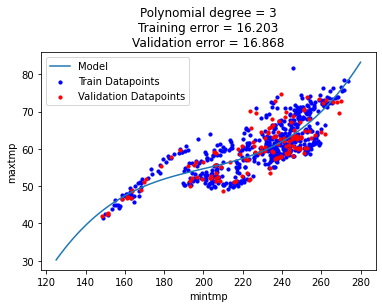

In [295]:
from statistics import mean
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SteamCurrent = pd.read_csv('Steam.csv')
SteamCurrent = SteamCurrent[['Dates','Users','In-Game']]

X=SteamCurrent['Users'].to_numpy().reshape(-1,1)
y=SteamCurrent['In-Game'].to_numpy()
X_rem, X_test, y_rem, y_test = train_test_split(X,y,test_size=0.1,random_state = 42)
k = KFold(n_splits=7,shuffle=True,random_state=42)

tr_errors = []
val_errors = []
coefficients = []
intercepts = []
x = 0

for (train_indices, val_indices) in kFold.split(X_rem):
    X_train, y_train, X_val, y_val = X[train_indices], y[train_indices],X[val_indices], y[val_indices]
    
    lin_regr = LinearRegression()
    poly = PolynomialFeatures(degree=3)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error =  mean_squared_error(y_train, y_pred_train)
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    coefficients.append(lin_regr.coef_)
    intercepts.append(lin_regr.intercept_)
    x += 1
    print("CV iteration " + str(x))
    print("Training error: " + str(tr_error))
    print("Validation error: " + str(val_error))
    print("\n")

print("\n\nAverage training error: " + str(sum(tr_errors)/5))
print("Average validation error: " + str(sum(val_errors)/5))
print("\nLearned weights: ",)
for coef in coefficients:
    print(coef)
print("\nLearned intercepts: " + str(intercepts))
X_fit = np.linspace(125, 280, 100)    # generate samples
plt.tight_layout()
plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")    # plot the polynomial regression model
plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")    # do the same for validation data with color 'red'
plt.xlabel('mintmp')    # set the label for the x/y-axis
plt.ylabel('maxtmp')
plt.legend(loc="best")    # set the location of the legend
plt.title(f'Polynomial degree = {3}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')    # set the title
plt.show()    # show the plot


CV iteration 1
Training error: 15.784201738102192
Validation error: 16.875509163348095


CV iteration 2
Training error: 16.526850061126442
Validation error: 13.904510026230728


CV iteration 3
Training error: 15.924059236276694
Validation error: 16.33755964370222


CV iteration 4
Training error: 15.780093601663843
Validation error: 16.899214087794082


CV iteration 5
Training error: 15.862085176757587
Validation error: 16.738211597909544




Average training error: 15.975457962785352
Average validation error: 16.151000903796934

Learned weights: 
[ 0.00000000e+00  1.31362364e+02 -1.20459203e+00  5.49377885e-03
 -1.24697394e-05  1.12928262e-08]
[ 0.00000000e+00  1.57252826e+02 -1.45248519e+00  6.66832528e-03
 -1.52232102e-05  1.38477105e-08]
[ 0.00000000e+00  1.25037283e+02 -1.15136469e+00  5.27318027e-03
 -1.20169579e-05  1.09220366e-08]
[ 0.00000000e+00  1.38851389e+02 -1.27665382e+00  5.83251717e-03
 -1.32461551e-05  1.19857759e-08]
[ 0.00000000e+00  1.45418934e+02 -1.32483619e+00  5

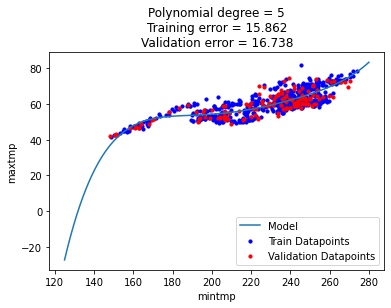

In [267]:
from statistics import mean
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SteamCurrent = pd.read_csv('Steam.csv')
SteamCurrent = SteamCurrent[['Dates','Users','In-Game']]

X=SteamCurrent['Users'].to_numpy().reshape(-1,1)
y=SteamCurrent['In-Game'].to_numpy()
X_rem, X_test, y_rem, y_test = train_test_split(X,y,test_size=0.1,random_state = 42)
k = KFold(n_splits=5,shuffle=True,random_state=42)

tr_errors = []
val_errors = []
coefficients = []
intercepts = []
x = 0

for (train_indices, val_indices) in kFold.split(X_rem):
    X_train, y_train, X_val, y_val = X[train_indices], y[train_indices],X[val_indices], y[val_indices]
    
    lin_regr = LinearRegression()
    poly = PolynomialFeatures(degree=5)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error =  mean_squared_error(y_train, y_pred_train)
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    coefficients.append(lin_regr.coef_)
    intercepts.append(lin_regr.intercept_)
    x += 1
    print("CV iteration " + str(x))
    print("Training error: " + str(tr_error))
    print("Validation error: " + str(val_error))
    print("\n")
    
print("\n\nAverage training error: " + str(sum(tr_errors)/5))
print("Average validation error: " + str(sum(val_errors)/5))
print("\nLearned weights: ",)
for coef in coefficients:
    print(coef)
print("\nLearned intercepts: " + str(intercepts))
X_fit = np.linspace(125, 280, 100)    # generate samples
plt.tight_layout()
plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")    # plot the polynomial regression model
plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")    # do the same for validation data with color 'red'
plt.xlabel('mintmp')    # set the label for the x/y-axis
plt.ylabel('maxtmp')
plt.legend(loc="best")    # set the location of the legend
plt.title(f'Polynomial degree = {5}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')    # set the title
plt.show()    # show the plot


CV iteration 1
Training error: 15.638128912861962
Validation error: 16.57085196823009


CV iteration 2
Training error: 16.420992653061397
Validation error: 13.402511488857074


CV iteration 3
Training error: 15.766781838068074
Validation error: 16.085626771043664


CV iteration 4
Training error: 15.466899040703531
Validation error: 17.334165442247166


CV iteration 5
Training error: 15.662577257742441
Validation error: 16.59100521897791




Average training error: 15.79107594048748
Average validation error: 15.99683217787118

Learned weights: 
[ 0.00000000e+00  2.19666533e-14  8.38738824e-17  3.02513097e-16
  3.62950386e-14  3.19775099e-12  1.63390828e-10 -2.52007693e-12
  1.47941243e-14 -3.89887767e-17  3.88033955e-20]
[ 0.00000000e+00 -4.38063144e-14  1.68539732e-17  3.05873309e-16
  3.67770123e-14  3.24637361e-12  1.66160449e-10 -2.57031796e-12
  1.51342067e-14 -4.00044211e-17  3.99314251e-20]
[ 0.00000000e+00  8.30075773e-14 -1.13139863e-17  3.06575315e-16
  3.66335686e-14  3.21424

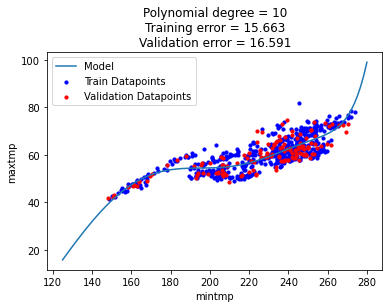

In [268]:
from statistics import mean
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SteamCurrent = pd.read_csv('Steam.csv')
SteamCurrent = SteamCurrent[['Dates','Users','In-Game']]

X=SteamCurrent['Users'].to_numpy().reshape(-1,1)
y=SteamCurrent['In-Game'].to_numpy()
X_rem, X_test, y_rem, y_test = train_test_split(X,y,test_size=0.1,random_state = 42)
k = KFold(n_splits=5,shuffle=True,random_state=42)

tr_errors = []
val_errors = []
coefficients = []
intercepts = []
x = 0

for (train_indices, val_indices) in kFold.split(X_rem):
    X_train, y_train, X_val, y_val = X[train_indices], y[train_indices],X[val_indices], y[val_indices]
    
    lin_regr = LinearRegression()
    poly = PolynomialFeatures(degree=10)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error =  mean_squared_error(y_train, y_pred_train)
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    coefficients.append(lin_regr.coef_)
    intercepts.append(lin_regr.intercept_)
    x += 1
    print("CV iteration " + str(x))
    print("Training error: " + str(tr_error))
    print("Validation error: " + str(val_error))
    print("\n")

print("\n\nAverage training error: " + str(sum(tr_errors)/5))
print("Average validation error: " + str(sum(val_errors)/5))
print("\nLearned weights: ",)
for coef in coefficients:
    print(coef)
print("\nLearned intercepts: " + str(intercepts))
X_fit = np.linspace(125, 280, 100)    # generate samples
plt.tight_layout()
plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")    # plot the polynomial regression model
plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")    # do the same for validation data with color 'red'
plt.xlabel('mintmp')    # set the label for the x/y-axis
plt.ylabel('maxtmp')
plt.legend(loc="best")    # set the location of the legend
plt.title(f'Polynomial degree = {10}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')    # set the title
plt.show()    # show the plot


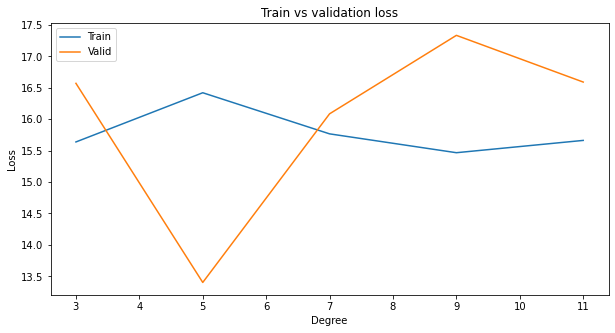

In [270]:

plt.figure(figsize=(10, 5))

plt.plot(degrees, tr_errors, label = 'Train')
plt.plot(degrees, val_errors,label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()


In [271]:
from statistics import mean
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SteamCurrent = pd.read_csv('Steam.csv')
SteamCurrent = SteamCurrent[['Dates','Users','In-Game']]

X=SteamCurrent['Users'].to_numpy().reshape(-1,1)
y=SteamCurrent['In-Game'].to_numpy()
X_rem, X_test, y_rem, y_test = train_test_split(X,y,test_size=0.1,random_state = 42)
k = KFold(n_splits=5,shuffle=True,random_state=42)

tr_errors = []
val_errors = []
coefficients = []
intercepts = []
x = 0 

for (train_indices, val_indices) in kFold.split(X_rem):
    X_train, y_train, X_val, y_val = X[train_indices], y[train_indices],X[val_indices], y[val_indices]
    
    lin_regr = LinearRegression()
    lin_regr.fit(X_train, y_train)

    y_pred_train = lin_regr.predict(X_train)
    tr_error = mean_squared_error(y_train, y_pred_train)
    y_pred_val = lin_regr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred_val)

    tr_errors.append(tr_error)
    val_errors.append(val_error)
    coefficients.append(lin_regr.coef_)
    intercepts.append(lin_regr.intercept_)
    x += 1

    print("CV iteration " + str(x))
    print("Training error: " + str(tr_error))
    print("Validation error: " + str(val_error))
    print("\n")

print("\n\nAverage training error: " + str(sum(tr_errors)/5))
print("Average validation error: " + str(sum(val_errors)/5))
print("\nLearned weights: ",)
for coef in coefficients:
    print(coef)
print("\nLearned intercepts: " + str(intercepts))



CV iteration 1
Training error: 18.23984810815931
Validation error: 18.073832441066155


CV iteration 2
Training error: 18.60988474870922
Validation error: 16.57430202024081


CV iteration 3
Training error: 17.714461853672912
Validation error: 20.145433560077993


CV iteration 4
Training error: 17.910835414331814
Validation error: 19.367380667118418


CV iteration 5
Training error: 18.492778326844196
Validation error: 17.052699214949833




Average training error: 18.19356169034349
Average validation error: 18.24272958069064

Learned weights: 
[0.2159995]
[0.21170512]
[0.21112347]
[0.2106419]
[0.21523906]

Learned intercepts: [11.075230264252717, 12.02678267701161, 12.224096474144183, 12.309578362440448, 11.334900156489667]


In [308]:
from statistics import mean
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SteamCurrent = pd.read_csv('Steam.csv')
SteamCurrent = SteamCurrent[['Dates','Users','In-Game']]

tr_errors = []
val_errors = []
coefficients = []
intercepts = []
x = 0 

X=SteamCurrent['Users'].to_numpy().reshape(-1,1)
y=SteamCurrent['In-Game'].to_numpy()
X_rem, X_test, y_rem, y_test = train_test_split(X,y,test_size=0.1,random_state = 42)
k = KFold(n_splits=7,shuffle=True,random_state=42)


for (i, j) in k.split(X_rem):
    X_train, y_train, X_val, y_val = X[i], y[i],X[j], y[j]
    
    lin_regr = LinearRegression()
    lin_regr.fit(X_train, y_train)

    y_pred_train = lin_regr.predict(X_train)
    tr_error = mean_squared_error(y_train, y_pred_train)
    y_pred_val = lin_regr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred_val)

    tr_errors.append(tr_error)
    val_errors.append(val_error)
    coefficients.append(lin_regr.coef_)
    intercepts.append(lin_regr.intercept_)
    x += 1

    print("Iteration No.: " + str(x))
    print("Training error: " + str(tr_error))
    print("Validation error: " + str(val_error))
    print("\n")

print("Average val error: " + str(sum(val_errors)/7))
print("Average tr error: " + str(sum(tr_errors)/7))
print("Learned weights: "+ str(coefficients))
print("\nLearned intercepts: " + str(intercepts))

Iteration No.: 1
Training error: 18.12136469929807
Validation error: 18.701333596997816


Iteration No.: 2
Training error: 18.731361680499916
Validation error: 15.057447698227476


Iteration No.: 3
Training error: 17.99467985064364
Validation error: 19.419520495847735


Iteration No.: 4
Training error: 17.666729958943982
Validation error: 21.406686862815693


Iteration No.: 5
Training error: 18.385629724781978
Validation error: 17.115663036611032


Iteration No.: 6
Training error: 18.112351897782347
Validation error: 18.73928144655707


Iteration No.: 7
Training error: 18.34436394538865
Validation error: 17.395925595681934


Average val error: 18.262265533248392
Average tr error: 18.193783108191223
Learned weights: [array([0.21343814]), array([0.21531366]), array([0.21262445]), array([0.21065858]), array([0.21303664]), array([0.21104361]), array([0.2141925])]

Learned intercepts: [11.60906303302064, 11.302994074017697, 11.868319789673166, 12.305698731247425, 11.70382225615753, 12.22936